# Exercise - Investigate High Paying Skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy().dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
185552,Data Analyst,Data Analyst,"Brooklyn, NY",via Indeed,Full-time,False,"New York, United States",2023-11-20 14:59:53,False,True,United States,year,69200.890625,NaN,Emerest Connect,"[sql, python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
280337,Data Analyst,Data Analyst,"Orlando, FL",via BeBee,Full-time and Temp work,False,"Florida, United States",2023-12-07 07:02:51,False,True,United States,year,75000.000000,NaN,Aquent Talent,"[confluence, jira, smartsheet, workfront, zoom...","{'async': ['confluence', 'jira', 'smartsheet',..."
284334,Data Analyst,Research Data Analyst,"Baltimore, MD",via Indeed,Full-time,False,"New York, United States",2023-05-25 07:00:28,False,True,United States,year,81650.000000,NaN,Johns Hopkins University,"[sas, sas]","{'analyst_tools': ['sas'], 'programming': ['sa..."
36052,Data Analyst,API Data Analyst - Full time,"Atlanta, GA",via Dice,Full-time,False,Georgia,2023-03-14 13:45:26,True,False,United States,year,130000.000000,NaN,Talent Hires,None,None
525806,Data Analyst,Lead Data Analyst,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-01-28 11:00:40,False,True,United States,year,144481.500000,NaN,Edward Jones,None,None


In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [8]:
df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [15]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

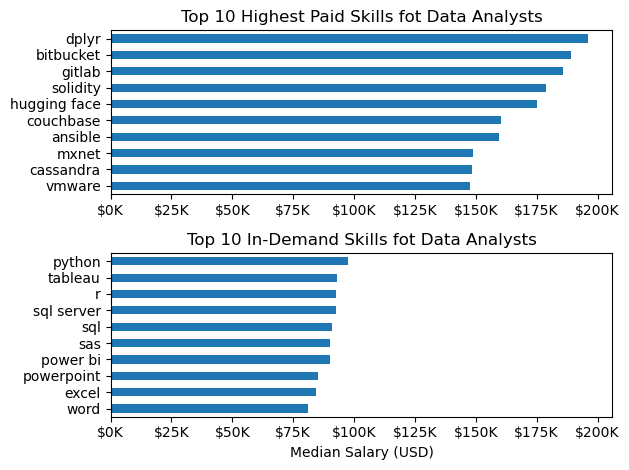

In [33]:
fig, ax = plt.subplots(2, 1)

# The [::-1] reverses the order of the DataFrame
# so we don't have to use ax[0].invert_yaxis()
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills fot Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 In-Demand Skills fot Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()